### MAP556, Ecole Polytechnique, 2022-23

# TP 1 - Simulation de variables aléatoires et thèoremes limites fondamentaux


### Exercice 1. Simulation de variables aléatoires dans Python. Loi des grands nombres.

Soit $(X_i)_{i\ge1}$ une suite de variables aléatoires i.i.d. telles que $\mathbb{E}\bigl[ \bigl|X_1\bigr| \bigr]<\infty$.
La loi forte des grands nombres affirme que la suite des _moyennes empiriques_
$$
\overline{X}_n = \frac1n \sum_{i=1}^n X_i
$$
converge presque surement vers $\mathbb{E}[X_1]$ lorsque $n\to \infty$.

#### 1.1 Affichage de la convergence de la suite $\bar X_n$

Simuler un grand nombre $N$ de variables aléatoires uniformes sur $[0,1]$ indépendantes et répresenter graphiquement la suite des moyennes empiriques $\overline{X}_n$ pour $n$ allant de $1$ à $N$.

On pourra utiliser la fonction `numpy.random.rand` pour obtenir les tirages de la loi uniforme et la fonction `numpy.cumsum` pour calculer la moyenne empirique cumulée jusqu'à $n$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

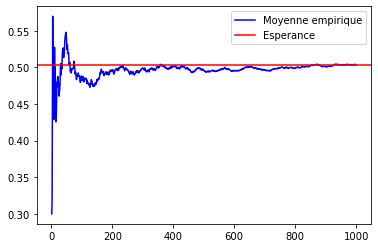

In [2]:
N = 1000 #Nombre de tirages

########
# Completer avec N tirages de la loi uniforme sur [0,1]
#
X = [np.random.rand() for i in np.arange(N)]
#
########

integers1toN = np.arange(1,N+1) # Un array contenant  les entiers de 1 a N

############
# Stocker dans la variable 'moyenneEmp' la suite de moyennes empiriques
# pour n allant de 1 a N
#
moyenneEmp = [np.mean(X[0:i]) for i in integers1toN]
#
############

############
#Affichage
############
plt.plot(integers1toN , moyenneEmp, color="b", label="Moyenne empirique")

# Une ligne horizontale pour afficher la valeur limite
esperance = moyenneEmp[-1]
plt.axhline(esperance, color="r", label="Esperance")

plt.legend(loc="best")

# On affiche la figure dans la console
plt.show()

#### 1.2 Un autre exemple

La loi de Cauchy de paramètre $a > 0$ est la loi sur $\mathbb R$ de densité
$$
f(x) = \frac a{\pi(a^2+x^2)}.
$$

#### $\blacktriangleright$ Question (a):

Soit $F(x)=\int_{-\infty}^x f(y) dy $ sa fonction de répartition. Soit $U$ une v.a. de loi uniforme sur $[0,1]$. Quelle est la loi de $F^{-1}(U)$?

#### $\blacktriangleright$ Question (b):

En remarquant que $F(x) = \frac1{\pi}\arctan(\frac xa)+\frac12$, générer un grand nombre $N$ de variables aléatoires indépendantes de loi de Cauchy de paramètre $a=1$, toujours en utilisant la fonction `numpy.random.rand`.

Répresenter graphiquement la suite des moyennes empiriques $\overline{X}_n$ pour $n$ allant de $1$ à $N$. Qu'observez-vous?

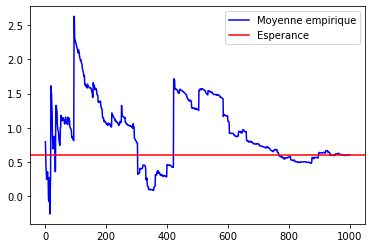

In [11]:
N = 1000
U = np.random.rand(N)

a = 1.

########
# Stocker dans X des simulations de la loi de Cauchy de parametre a
# en utilisant l'inverse de la fct de repartition
#
X = [a*np.tan(np.pi*(np.random.rand()-0.5)) for i in np.arange(N)]
#
########

integers1toN = np.arange(1,N+1)

########
# Calculer et stocker dans la variable 'moyenneEmp' la suite des moyennes empiriques
# 
moyenneEmp = [np.mean(X[0:i]) for i in integers1toN]
# 
# Afficher la suite à l'aide de la fonction plot de matplotlib.pyplot
#
plt.plot(integers1toN , moyenneEmp, color="b", label="Moyenne empirique")

# Une ligne horizontale pour afficher la valeur limite
esperance = moyenneEmp[-1]
plt.axhline(esperance, color="r", label="Esperance")

plt.legend(loc="best")

# On affiche la figure dans la console
plt.show()

### Exercice 2.  Théoreme central limite. Intervalles de confiance.

Soit $(X_i)_{i\ge1}$ une suite de variables aléatoires i.i.d. telles que $\mathbb E[X_1^2]<\infty$, et $\overline{X}_n = \frac1n \sum_{i=1}^n X_i$ la suite de leurs moyennes empiriques.

Le théoreme central limite affirme que la suite des erreurs renormalisées
$$
e_n = \frac{\sqrt n}{\sqrt{Var(X_1)}} \left(\overline{X}_n - \mathbb E[X_1]\right)
$$
converge en loi vers une gaussienne $\mathcal{N}(0,1)$ lorsque $n \to \infty$.

### 2.1 Affichage de la convergence en loi

#### $\blacktriangleright$ Question (a): 
 
On considère une suite iid de v.a. exponentielles de paramètre 2. Pour $N$ fixé, obtenir un échantillon de $M$ valeurs de la moyenne empirique $(\overline{X}_N^j)_{j=1,\dots,M}$.

Tracer l'histogramme des valeurs correspondantes de l'erreur normalisée
$$
    e^j_N = \sqrt{\frac N{Var(X_1)}} \bigl(\overline{X}^j_N - \mathbb E[X_1] \bigr),
\qquad j = 1, \dots, M
$$
et le comparer avec la densité gaussienne centrée réduite. 

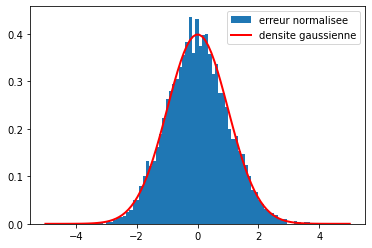

In [26]:
N = 3000 # Nombre de tirages pour le calcul de la moyenne empirique
M = 5000 # Nombre de repetitions

####################################################
# Tirages independants de N*M v.a. exponentielles
# de parametre lambda=2
#
lambd = 2
# ATTENTION: la fonction random.exponential prens comme premier argument
#  la moyenne 1/lambda de la distribution, et non pas son parametre lambda

X = np.random.exponential(1/lambd, (M, N))
####################################################

esp = 1/lambd
var = (1/lambd)**2

####################################################
# Stocker dans la variable 'moyenneEmp_N' un echantillon de M valeurs
# de la moyenne empirique Xbar_N
#
moyenneEmp_N = [np.mean(X[i]) for i in np.arange(M)]
#
# Stocker dans la variable 'erreurNormalisee_N' l'echantillon de M valeurs
# de l'erreur normalisee
#
erreurNormalisee_N = [np.sqrt(N/var)*(moyenneEmp_N[j]-esp) for j in np.arange(M)]
####################################################


####################################################
# Affichage
plt.hist(erreurNormalisee_N , density="True", bins=int(np.sqrt(M)), label="erreur normalisee")

####################################################
# Completer avec le calcul de la densite gaussienne centree reduite
# sur les abscisses x
x = np.linspace(-5,5,100)

densiteGaussienne = np.exp(-0.5*x**2)/np.sqrt(2*np.pi)

####################################################
# Affichage
plt.plot(x,densiteGaussienne, color="red", label="densite gaussienne", linewidth=2.0)

plt.legend(loc="best")

#### $\blacktriangleright$ Question (b): 
 
Afin d'illuster la différence entre convergence en loi et convergence presque sure, tracer une réalisation de la suite $e_n$ pour $n$ variant de $1$ à $N$.

Qu'observez-vous?

(array([5.26190782e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.26190782e-04, 5.26190782e-04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 5.26190782e-04, 5.26190782e-04, 1.05238156e-03,
        5.26190782e-04, 1.05238156e-03, 2.10476313e-03, 1.57857235e-03,
        3.52547824e-02, 7.99809989e-02, 3.23607331e-01, 6.35638465e-01,
        2.93088266e-01, 1.57857235e-02, 6.84048017e-03, 1.99952497e-02,
        3.78857363e-02, 2.57833483e-02, 2.52571575e-02, 2.73619207e-02,
        1.47333419e-02, 1.26285788e-02, 6.84048017e-03, 3.68333547e-03,
        1.05238156e-03, 0.00000000e+00, 5.26190782e-04, 0.00000000e+00,
        0.00000000e+00, 5.26190782e-04, 5.26190782e-04, 5.26190782e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

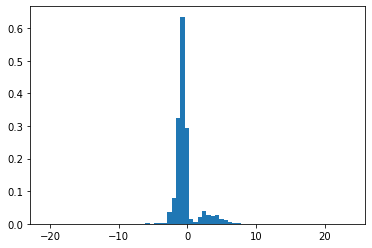

In [31]:
N = 3000
lambd = 2.

X = np.random.exponential(1/lambd, N)

esp = 1/lambd
var = (1/lambd)**2

################################################
## Question (b): completer avec le calcul d'une
## realisation de la suite des erreurs normalisees
## et son affichage 
erreur_N = [np.sqrt(N/var)*(np.mean(X[0:j])-esp) for j in np.arange(N)]

plt.hist(erreur_N , density="True", bins=int(np.sqrt(M)), label="erreur normalisee")
################################################

### 2.2 Intervalles de confiance

A différence de l'exemple précédent, en pratique on ne connait pas la valeur $Var(X_1)$.
On peut cependant l'estimer à partir des memes simulations, en utilisant l'estimateur de la variance
$$
\sigma_n^2 = \frac1n \sum_{i=1}^n X_i^2 - (\overline{X}_n)^2
$$

#### $\blacktriangleright$ Question (a):

Quel resultat permet d'affirmer que la suite
$$
\frac{\sqrt n}{\sigma_n} \left(\overline{X}_n - \mathbb E[X_1]\right)
$$
converge en loi vers $\mathcal{N}(0,1)$?

#### $\blacktriangleright$ Question (b):

En définissant l'intervalle (aléatoire) $I_n^{\delta}=\left[\overline{X}_n-\delta\frac{\sigma_n}{\sqrt n},\overline{X}_n+\delta\frac{\sigma_n}{\sqrt n}\right]$, $\delta>0$, la question précédente entraine
$$
\mathbb P\Bigl(\mathbb E[X_1] \in I_n^{\delta}\Bigr)
=
\mathbb P\biggl(\frac{\sqrt n}{\sigma_n} \bigl|\overline{X}_n - \mathbb E[X_1]\bigr| \le \delta \biggr)
\longrightarrow \mathbb P(|\mathcal{N}(0,1)|\le \delta) = 2\int_0^{\delta} \frac{e^{-x^2/2}}{\sqrt{2\pi}} dx
$$
lorsque $n \to \infty$.

Pour $\delta=1.96$, le dernier terme à droite vaut approximativement $0.95$, ce qui permet d'idéntifier $I_n^{1.96}$ comme étant l'intervalle de confiance _asymptotique_ à $95\%$ pour l'espérance $\mathbb E[X_1]$.

Fournir une estimation de l'espérance de v.a. uniformes sur $[0,1]$ avec son intervalle de confiance à $95\%$ donné par le TCL.

In [ ]:
N = 1000
X = np.random.rand(N)
esp = 0.5

moyenneEmp = np.sum(X) / N

################################################################
# Stocker dans la variable 'moyenneCarres' la moyenne empirique
# des carres de X
#
# moyenneCarres = ... 
#
# Stocker dans la variable 'varianceEmp' la variance empirique
# et dans 'demiLargeurIC' la demi largeur de l'intervalle de 
# confiance a 95%
#
# varianceEmp = ... 
# 
# demiLargeurIC = ...
# 
########

print("esperance: %1.4f \n" %esp)
print("moyenne empirique: %1.4f \n" %moyenneEmp)

print("IC a 0.95: [%1.4f, %1.4f] \n" %(moyenneEmp - demiLargeurIC, moyenneEmp + demiLargeurIC) )

print("erreur relative*100: %1.1f" %(demiLargeurIC/moyenneEmp * 100) )